In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms

In [5]:
mnist_train = datasets.MNIST(root='./datasets', train=True, transform=transforms.ToTensor(), download=True)

mnist_test = datasets.MNIST(root='./datasets', train=False, transform=transforms.ToTensor(), download=True)

print("MNIST train data shape: ", mnist_train.data.shape)
print("MNIST test data shape: ", mnist_test.data.shape)

100.0%
100.0%
100.0%
100.0%

MNIST train data shape:  torch.Size([60000, 28, 28])
MNIST test data shape:  torch.Size([10000, 28, 28])


In [11]:
image, label = mnist_train[3]
print(image.shape)
image = image.reshape([28, 28])
print(image.shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])


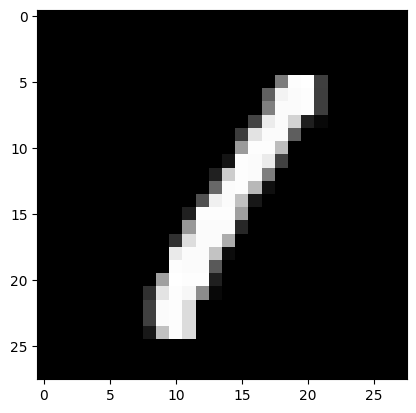

1


In [13]:
plt.imshow(image, cmap='gray')
plt.show()
print(label)

In [15]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [17]:
data_train_iter = iter(train_loader)
image, label = data_train_iter.__next__()
print(image.shape)
print(label.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


In [18]:
x = image.view(-1, 28*28)
print(x.shape)

torch.Size([100, 784])


$$ y_1 = \sum_i x_i w_{i, 1} + b_1 $$

In [19]:
W = torch.randn(784, 10) / np.sqrt(784)
b = torch.zeros(10, requires_grad=True)

In [20]:
y = torch.matmul(x, W) + b